In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.09281666666666667


0.09281666666666667

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

lr_decay_step = 10
lr_decay = 0.5
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_decay_step, gamma=lr_decay)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
#         loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    
    scheduler.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:26, 114.61it/s]
15it [00:00, 149.01it/s]

Epoch : 1, Train Accuracy : 0.9771333333333333, Test Accuracy : 0.9707


3000it [00:30, 98.54it/s] 
14it [00:00, 132.05it/s]

Epoch : 2, Train Accuracy : 0.9846833333333334, Test Accuracy : 0.9769


3000it [00:30, 98.01it/s]
9it [00:00, 84.62it/s]

Epoch : 3, Train Accuracy : 0.9881, Test Accuracy : 0.9771


3000it [00:33, 90.30it/s] 
9it [00:00, 87.31it/s]

Epoch : 4, Train Accuracy : 0.9896333333333334, Test Accuracy : 0.9779


3000it [00:33, 89.70it/s]
5it [00:00, 44.91it/s]

Epoch : 5, Train Accuracy : 0.99245, Test Accuracy : 0.9792


3000it [00:44, 67.94it/s]
7it [00:00, 61.35it/s]

Epoch : 6, Train Accuracy : 0.99305, Test Accuracy : 0.9788


3000it [00:46, 63.99it/s]
7it [00:00, 63.76it/s]

Epoch : 7, Train Accuracy : 0.9941333333333333, Test Accuracy : 0.9796


3000it [00:50, 59.83it/s]
7it [00:00, 61.34it/s]

Epoch : 8, Train Accuracy : 0.9948666666666667, Test Accuracy : 0.9801


3000it [00:47, 63.65it/s]
7it [00:00, 63.43it/s]

Epoch : 9, Train Accuracy : 0.9956333333333334, Test Accuracy : 0.9793


3000it [00:47, 63.03it/s]
6it [00:00, 55.87it/s]

Epoch : 10, Train Accuracy : 0.9954333333333333, Test Accuracy : 0.9782


3000it [00:47, 62.66it/s]
7it [00:00, 59.83it/s]

Epoch : 11, Train Accuracy : 0.9966833333333334, Test Accuracy : 0.9788


3000it [00:47, 62.78it/s]
6it [00:00, 59.06it/s]

Epoch : 12, Train Accuracy : 0.9971333333333333, Test Accuracy : 0.9796


3000it [00:47, 62.73it/s]
7it [00:00, 60.94it/s]

Epoch : 13, Train Accuracy : 0.9971833333333333, Test Accuracy : 0.9793


3000it [00:47, 63.02it/s]
6it [00:00, 56.96it/s]

Epoch : 14, Train Accuracy : 0.9975, Test Accuracy : 0.979


3000it [00:47, 63.67it/s]
5it [00:00, 45.21it/s]

Epoch : 15, Train Accuracy : 0.9976, Test Accuracy : 0.9795


3000it [00:47, 63.59it/s]
6it [00:00, 58.51it/s]

Epoch : 16, Train Accuracy : 0.9977666666666667, Test Accuracy : 0.9797


3000it [00:47, 63.49it/s]
6it [00:00, 58.80it/s]

Epoch : 17, Train Accuracy : 0.9978833333333333, Test Accuracy : 0.9788


3000it [00:47, 63.80it/s]
7it [00:00, 57.96it/s]

Epoch : 18, Train Accuracy : 0.9980166666666667, Test Accuracy : 0.9795


3000it [00:47, 63.78it/s]
6it [00:00, 59.79it/s]

Epoch : 19, Train Accuracy : 0.9979, Test Accuracy : 0.978


3000it [00:46, 63.98it/s]


Epoch : 20, Train Accuracy : 0.9981, Test Accuracy : 0.9797


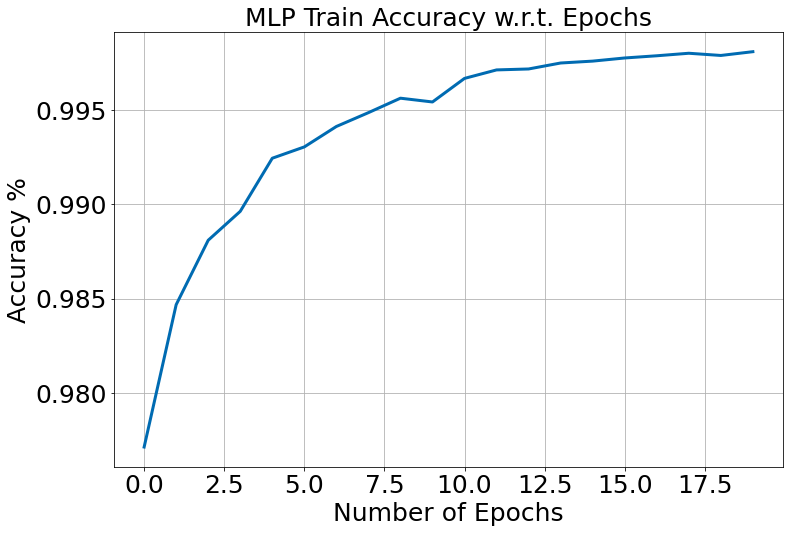

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

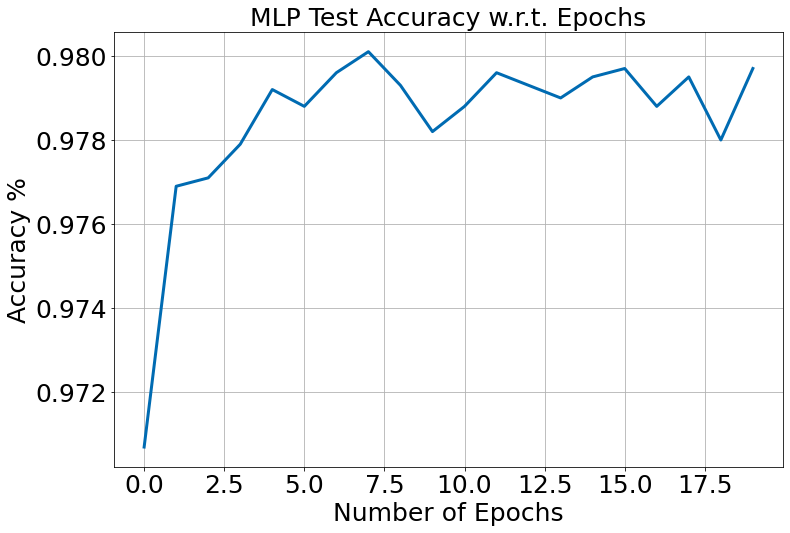

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)